# Regression of Used Car Prices Kaggle


![Image of a car showroom](./Used_car_showroom.jpg)




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. General Overview of the Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<a id="two"></a>
## 2. General Overview of the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head(4)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000


In [4]:
df_train.shape

(188533, 13)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [7]:
df_train.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [8]:
df_train['engine'].value_counts() / len(df_train)

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                             0.018363
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                             0.015393
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             0.015069
2.0L I4 16V GDI DOHC Turbo                                               0.014215
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                            0.013000
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                            0.012921
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             0.011600
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                             0.011340
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    0.011319
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    0.011054
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                            0.010168
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel                            0.010131
302.0HP 3

In [9]:
df_train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [10]:
df_train['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
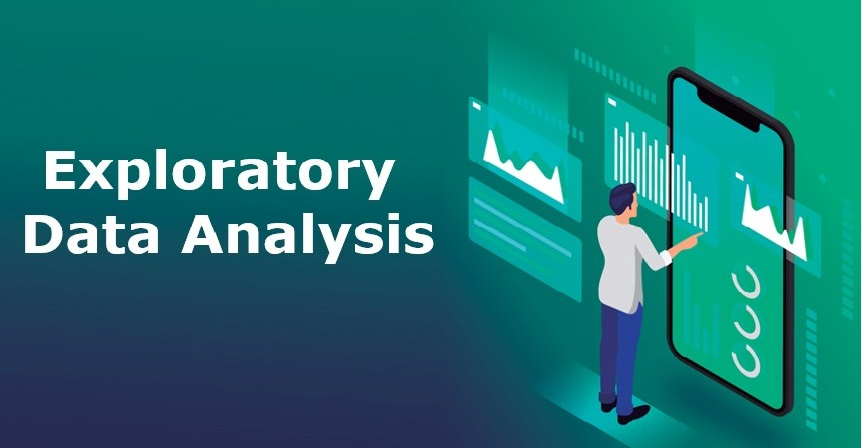
---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our predictor variables to know if they are useful in this project.

---


### Bivariate Analysis

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
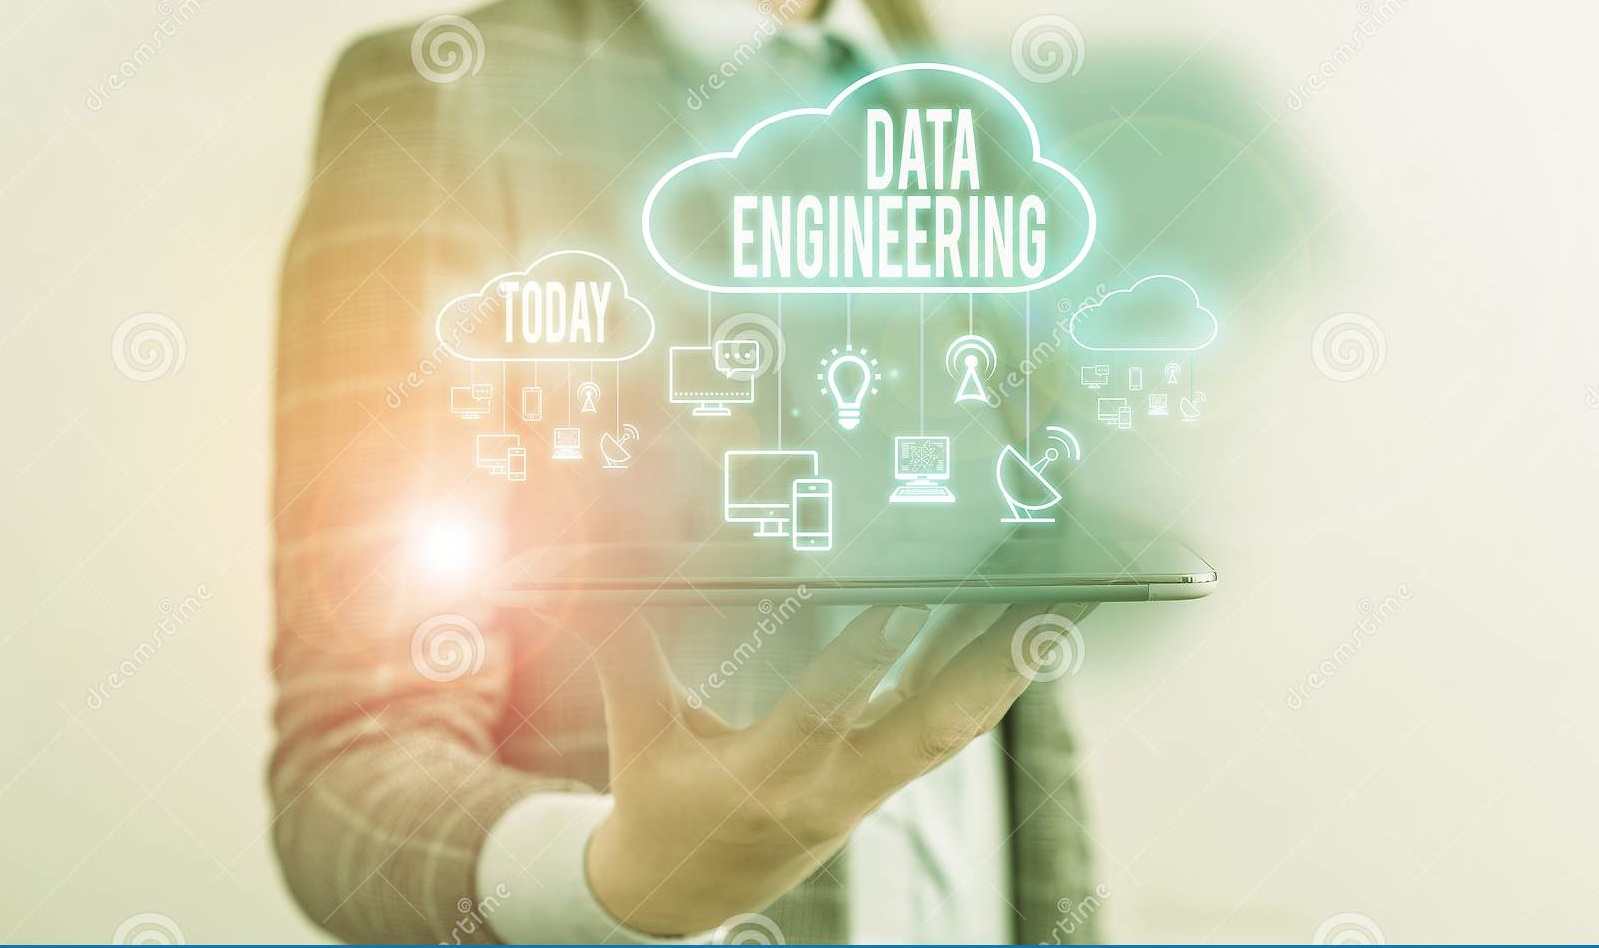
---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

#### Handling missing values

#### The data pre-processing and feature engineering will include:

1. Handling missing values
2. Scaling the numerical variables
3. Engineering new variables from existing 

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

#### Missing values Handling and Feature Creation

In [12]:
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, min_brand_frequency = 0.01):
        """
        Initialize the preprocessor.
        
        Parameters:
        brand_min_frequency: Minimum frequency for brands to be kept as separate categories
        """
        self.min_brand_frequency = min_brand_frequency
        self.frequent_brand = None
        self.hp_pattern = r'(\d+\.?\d*)\s*HP|(\d+\.?\d*)\s*[Hh]orsepower'
        self.dis_pattern = r'(\d+\.?\d*)\s*(?:L|Liter)'
        self.cylinder_pattern = r'(\d+)\s*Cylinder'

    def _extract_engine_feature(self, eng_str):
             
        """ Create three new features from the engine column"""
        import re
        hp = re.search(self.hp_pattern, eng_str)
        if hp:
                hp = float(hp.group(1)) if hp.group(1) else float(hp.group(2))
        else:
                hp = np.nan

        displacement = re.search(self.dis_pattern, eng_str)
        displacement = float(displacement.group(1)) if displacement else np.nan

        cylinder = re.search(self.cylinder_pattern, eng_str)
        cylinder  = int(cylinder.group(1)) if cylinder else np.nan

        return hp, displacement, cylinder
        

    def _simplified_transmission(self, trans_str):
        """ Simplify transmissions to basic categories"""
        trans_str = trans_str.upper()
        if 'A/T' in trans_str or 'AUTOMATIC' in trans_str or 'AT' in trans_str:
            return 'Automatic'
        elif 'M/T' in trans_str or 'MANUAL' in trans_str or 'MT'  in trans_str:
            return 'Manual'
        else:
            return 'Other'

    def _handle_categorical (self, df):

        df = df.copy()

        """ Preprocess categorical variables"""

        # Let's create a category for rare brands
        brand_frequency = df['brand'].value_counts(normalize=True)
        self.frequent_brand = brand_frequency[brand_frequency >= self.min_brand_frequency].index
        df['brand'] = df['brand'].apply(lambda x: x if x in self.frequent_brand else 'Other')

        # Create simplified categories for transmissions
        df['transmission'] = df['transmission'].apply(self._simplified_transmission)
        
        # Handle the missing categorical values
        df['clean_title'] = df['clean_title'].fillna('Unknown')
        df['accident'] = df['accident'].fillna('Unknown')
        df['fuel_type'] = df['fuel_type'].fillna('Unknown')

        return df

    def _extract_engine_info(self, df):
        df = df.copy()
             
        engine_info = df['engine'].apply(self._extract_engine_feature)
        df['horsepower'] = engine_info.apply(lambda x: x[0])
        df['engine_displacement'] = engine_info.apply(lambda x: x[1])
        df['cylinder'] = engine_info.apply(lambda x: x[2])

            # Fill missing values with median for each numeric feature
        df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
        df['engine_displacement'] = df['engine_displacement'].fillna(df['engine_displacement'].median())
        df['cylinder'] = df['cylinder'].fillna(df['cylinder'].median())
        
        # Convert cylinder to int type since it should be a whole number
        df['cylinder'] = df['cylinder'].astype(int)

        return df

    def _handle_numeric (self, df):
        """ Preprocess the numeric variables"""
        df = df.copy()

        from datetime import datetime
        df['car_age'] = datetime.now().year - df['model_year']
        df['milage_log'] = np.log1p(df['milage'])

        return df
        
    def fit(self, X, y=None):
            """ Fit the preprocessor (learning the required parameters) """
            self._handle_categorical(X)
            return self
        
    def transform(self, df):
            
        """ Transform the dataset by applying the various preprocessor steps"""

        # Step 1: Create a copy of the dataset
        df = df.copy()

        # Step 2: Drop the unecessary column
        df = df.drop(['id'], axis=1)

        # Step 3: Apply the various steps
        df = self._extract_engine_info(df)

        df = self._handle_categorical(df)

        df = self._handle_numeric(df)

        # Drop column with no use anymore
        df = df.drop(['model_year', 'engine'], axis=1) 

        return df

In [13]:
preprocessor = DataPreprocessor()

train_processed = preprocessor.fit_transform(df_train)
test_processed = preprocessor.transform(df_test)

#### Feature Scaling and Categorical Encoding

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from feature_engine.encoding import RareLabelEncoder

In [15]:
# Separate features and target in the processed train data
X_train = train_processed.drop(columns=['price', 'milage', 'ext_col', 'int_col'], axis=1)
y_train = train_processed['price']

# Make sure to use test_processed, not df_test
X_test = test_processed.drop(columns=[ 'milage', 'ext_col', 'int_col'], errors='ignore') 

In [16]:

rare_encoder = RareLabelEncoder(tol=0.002, n_categories=10, variables=['model'])
X_train = rare_encoder.fit_transform(X_train)
X_test = rare_encoder.transform(X_test)

In [18]:
#### FEATURE 3

# Define column groups

categorical_ordinal = [ 'model', 'brand', 'transmission', 'accident', 'clean_title', 'fuel_type'] 

# Create the column transformer with more robust configuration
column_transformer = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(), categorical_ordinal)
    ],
    remainder='passthrough',
    verbose_feature_names_out=True
)

# Create a pipeline to ensure proper ordering of operations
preprocessing_pipeline = Pipeline([
    ('column_transformer', column_transformer)
])

# Fit and transform training data
X_train_transformed = preprocessing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Get feature names after transformation
feature_names = preprocessing_pipeline.get_feature_names_out()

# Convert to DataFrame for better interpretability
X_train_transformed_df = pd.DataFrame(
    X_train_transformed,
    columns=feature_names
)

X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names
)

# Print some information about the transformation
print("Transformed Training Data Shape:", X_train_transformed_df.shape)
print("Transformed Test Data Shape:", X_test_transformed_df.shape)
print("\nFeature names after transformation:")
print(feature_names)


Transformed Training Data Shape: (188533, 11)
Transformed Test Data Shape: (125690, 11)

Feature names after transformation:
['label__model' 'label__brand' 'label__transmission' 'label__accident'
 'label__clean_title' 'label__fuel_type' 'remainder__horsepower'
 'remainder__engine_displacement' 'remainder__cylinder'
 'remainder__car_age' 'remainder__milage_log']


In [19]:
X_train_transformed_df.head(2)

,label__model,label__brand,label__transmission,label__accident,label__clean_title,label__fuel_type,remainder__horsepower,remainder__engine_displacement,remainder__cylinder,remainder__car_age,remainder__milage_log
0,21.0,19.0,0.0,1.0,1.0,2.0,172.0,1.6,4.0,17.0,12.269052
1,76.0,15.0,0.0,0.0,1.0,2.0,252.0,3.9,8.0,22.0,11.872354


In [ ]:
#### FEATURE 2

# Define column groups

categorical_onehot = ['transmission', 'accident', 'clean_title', 'fuel_type']  # For low cardinality categories
categorical_target = [ 'model', 'brand']  # For high cardinality with target relationship
numerical_features = ['car_age', 'horsepower', 'engine_displacement', 'cylinder']

# Create the column transformer with more robust configuration
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(
                                handle_unknown='ignore', 
                                drop='if_binary'), 
         categorical_onehot),
        
        ('target', TargetEncoder(handle_unknown='value',
                               handle_missing='value'), 
         categorical_target),
        
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=True
)

# Create a pipeline to ensure proper ordering of operations
preprocessing_pipeline = Pipeline([
    ('column_transformer', column_transformer)
])

# Fit and transform training data
X_train_transformed = preprocessing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Get feature names after transformation
feature_names = preprocessing_pipeline.get_feature_names_out()

# Convert to DataFrame for better interpretability
X_train_transformed_df = pd.DataFrame(
    X_train_transformed,
    columns=feature_names
)

X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names
)

# Print some information about the transformation
print("Transformed Training Data Shape:", X_train_transformed_df.shape)
print("Transformed Test Data Shape:", X_test_transformed_df.shape)
print("\nFeature names after transformation:")
print(feature_names)


In [ ]:

# Define column groups
categorical_ordinal = ['brand']  # For high cardinality categories
categorical_onehot = ['transmission', 'accident', 'clean_title', 'fuel_type']  # For low cardinality categories
categorical_target = [ 'model', 'brand']  # For high cardinality with target relationship
numerical_features = ['car_age', 'horsepower', 'engine_displacement', 'cylinder']

# Create the column transformer with more robust configuration
column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', 
                                 unknown_value=-1), 
         categorical_ordinal),
        
        ('onehot', OneHotEncoder(
                                handle_unknown='ignore', 
                                drop='if_binary'), 
         categorical_onehot),
        
        ('target', TargetEncoder(handle_unknown='value',
                               handle_missing='value'), 
         categorical_target),
        
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=True
)

# Create a pipeline to ensure proper ordering of operations
preprocessing_pipeline = Pipeline([
    ('column_transformer', column_transformer)
])

# Fit and transform training data
X_train_transformed = preprocessing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Get feature names after transformation
feature_names = preprocessing_pipeline.get_feature_names_out()

# Convert to DataFrame for better interpretability
X_train_transformed_df = pd.DataFrame(
    X_train_transformed,
    columns=feature_names
)

X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names
)

# Print some information about the transformation
print("Transformed Training Data Shape:", X_train_transformed_df.shape)
print("Transformed Test Data Shape:", X_test_transformed_df.shape)
print("\nFeature names after transformation:")
print(feature_names)


In [ ]:
X_test_transformed_df.head(3)

In [ ]:
"""

# Separate features and target in the processed train data
X_train = train_processed.drop(columns=['price', 'milage_log'], axis=1)
y_train = train_processed['price']

# Make sure to use test_processed, not df_test
X_test = test_processed.drop(columns=[ 'milage_log'], errors='ignore') 

# Define the encoders and transformations
column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ['brand']),  
        ('onehot', OneHotEncoder(), ['transmission', 'accident', 'clean_title']), 
        ('target', TargetEncoder(), ['int_col', 'ext_col', 'model'])
    ],
    remainder='passthrough'  # Leave other columns (e.g., numerical) unchanged
)

# Apply transformations to the training data
X_train_transformed = column_transformer.fit_transform(X_train, y_train)

# Apply transformations to the test data (use test_processed, not df_test)
X_test_transformed = column_transformer.transform(X_test)

# Output the transformed training data
print("Transformed Training Data:")
print(X_train_transformed.shape)
print(y_train.shape)

"""

In [ ]:
X_train_transformed.shape

In [ ]:
X_train_transformed_df.info()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created regression models that are able to accurately predict the three hour load shortfall. |

---

In [20]:
sample_id = df_test['id']

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold , GridSearchCV , train_test_split , RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
"""

# Convert y_train to numpy array for better performance
y_train_np = y_train.values

# Initialize models with optimized parameters for the given dataset size
model_names = ['AdaBoost', 'LightGBM', 'XGBRegressor', 'GradientBoostingRegressor']

models = [
    AdaBoostRegressor(
        n_estimators=100,
        random_state=21
    ),
    LGBMRegressor(
        n_estimators=100,
        num_leaves=31,
        random_state=21,
        n_jobs=-1
    ),
    XGBRegressor(
        n_estimators=100,
        max_depth=6,
        random_state=21,
        n_jobs=-1,
        tree_method='hist'  # For faster training
    ),
    GradientBoostingRegressor(
        n_estimators=100,
        max_depth=6,
        random_state=21
    )
]

# Optimize cross-validation for large dataset
cv = KFold(n_splits=5, shuffle=True, random_state=21)

# Dictionary to store errors
errors = {}

# Progress tracking
from tqdm import tqdm
print("\nEvaluating models:")

# Perform cross-validation for each model
for model_name, model in tqdm(zip(model_names, models), total=len(models)):
    try:
        # Perform cross-validation
        scores = cross_val_score(
            model, 
            X_train_transformed, 
            y_train_np,  # Using numpy array
            cv=cv, 
            scoring='neg_mean_squared_error', 
            n_jobs=-1,
            verbose=0
        )
        
        # Calculate and store RMSE
        rmse = np.sqrt(-scores)
        
        # Store both mean and std of RMSE
        errors[model_name] = {
            'mean_rmse': rmse.mean(),
            'std_rmse': rmse.std()
        }
        
    except Exception as e:
        print(f"\nError with {model_name}: {str(e)}")

# Display results with confidence intervals
print("\nModel Performance Summary (RMSE ± std):")
for model_name, metrics in sorted(errors.items(), key=lambda x: x[1]['mean_rmse']):
    print(f"{model_name:25} : {metrics['mean_rmse']:.4f} ± {metrics['std_rmse']:.4f}")

# Optional: Create a DataFrame with results
results_df = pd.DataFrame({
    'Model': list(errors.keys()),
    'RMSE': [metrics['mean_rmse'] for metrics in errors.values()],
    'Std': [metrics['std_rmse'] for metrics in errors.values()]
}).sort_values('RMSE')

print("\nDetailed Results DataFrame:")
print(results_df)

"""

In [22]:
# Declaring and initializing the ensemble models
models_name = ['AdaBoost', 'LightGBM', 'XGBRegressor', 'GradientBoostingRegressor']

models = [AdaBoostRegressor(),
                  LGBMRegressor(),
                  XGBRegressor(),
                  GradientBoostingRegressor()]

In [23]:
# Perform the cross-validation

cv = KFold(n_splits=10, shuffle=True, random_state=21)

In [24]:
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_train_transformed type:", type(X_train_transformed))
#print("Any NaN values:", np.isnan(X_train_transformed).any())

X_train_transformed shape: (188533, 11)
X_train_transformed type: <class 'numpy.ndarray'>


In [25]:
print("y_train shape:", y_train.shape)
print("y_train type:", type(y_train))
#print("Any NaN values in y:", np.isnan(y_train).any())

y_train shape: (188533,)
y_train type: <class 'pandas.core.series.Series'>


In [26]:
# 
errors = {}
for models_name, models in zip(models_name, models):
    scores = cross_val_score(models, X_train_transformed, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    errors[models_name] = np.sqrt(-scores).mean()

In [27]:
errors

{'AdaBoost': 87548.6972153538,
 'LightGBM': 72788.38613432004,
 'XGBRegressor': 74387.73641486799,
 'GradientBoostingRegressor': 72924.18510008909}

In [28]:
# Hyperparameter tuning LGBM Regressor
lgbm = LGBMRegressor(colsample_bytree = 0.8, learning_rate =  0.1, max_depth = 5, min_child_samples = 50, n_estimators = 100, num_leaves = 127, subsample = 0.8)

In [29]:
# Hyperparameter tuning LGBM Regressor
lgbm.fit(X_train_transformed, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 188533, number of used features: 11
[LightGBM] [Info] Start training from score 43878.016178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMRegressor(colsample_bytree=0.8, max_depth=5, min_child_samples=50,
              num_leaves=127, subsample=0.8)

In [30]:
lgbm_predict = lgbm.predict(X_test_transformed)

In [31]:
#prepare the submission
sub_df = pd.DataFrame({'id':sample_id,'price':lgbm_predict})
sub_df.head()

,id,price
0,188533,18591.837028
1,188534,74194.960144
2,188535,54063.436075
3,188536,24517.158870
4,188537,30343.737952


In [32]:
sub_df.to_csv('prices_cars_project_based.csv',index=False)

In [ ]:
#grid = GridSearchCV(estimator=model_catboost, param_grid = parameters, cv = 2, n_jobs=-1) #catboost

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
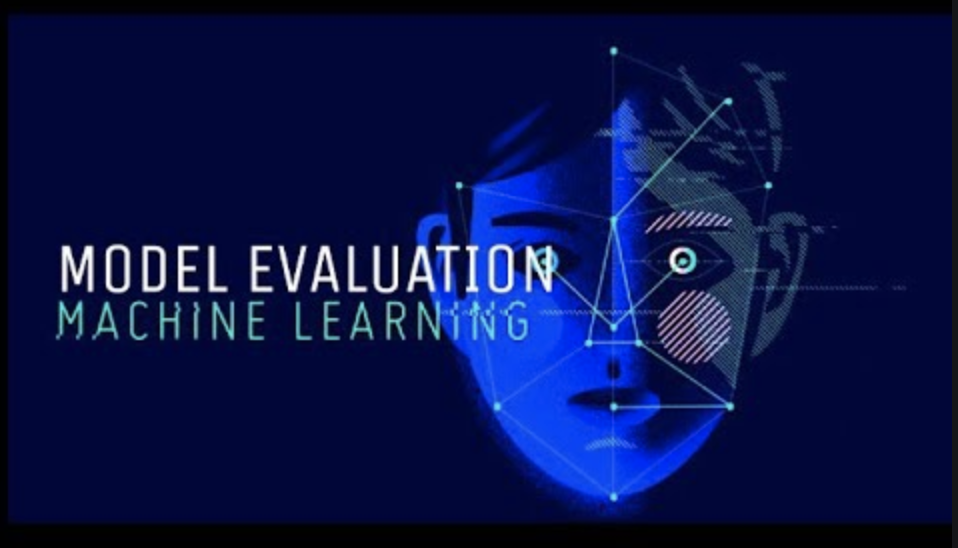
---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section the relative performance of the various trained ML models on a holdout dataset was carried out. 
---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
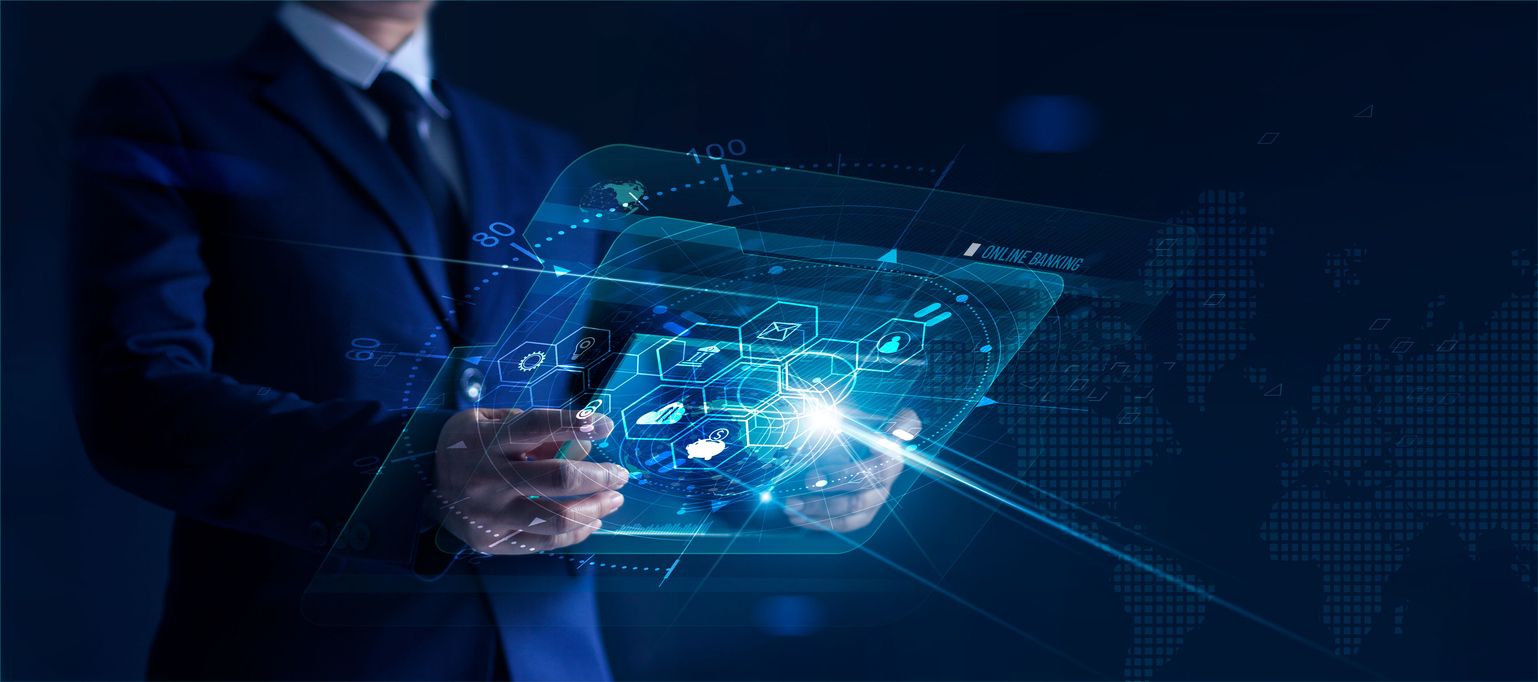
---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Discussing the logic for picking the chosen model

The following factors were considered when choosing the best model;

Presence or Absence of Linearity: From our dataset, we observed that the features were not linearly correlated with the target variable which makes it easy for us to dump the linear regression model even before seeing the  high rmse.

Consideration for Outliers: We chose the models based on how well they performed even in the presence of outliers.


Concerns of overfitting: We ensured we chose model that does not bring about overfitting. 


Root Mean Square Error upon prediction: The root mean square error was observed carefully and the model with the lowest rmse was selected as the best model.
